In [59]:
##Importing data from github
import pandas as pd
import requests
import io
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')),error_bad_lines=False,sep=',',engine='python')



In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136250 entries, 0 to 136249
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    136250 non-null  object 
 1   continent                                   127568 non-null  object 
 2   location                                    136250 non-null  object 
 3   date                                        136250 non-null  object 
 4   total_cases                                 128722 non-null  float64
 5   new_cases                                   128717 non-null  float64
 6   new_cases_smoothed                          127677 non-null  float64
 7   total_deaths                                117477 non-null  float64
 8   new_deaths                                  117673 non-null  float64
 9   new_deaths_smoothed                         127677 non-null  float64
 

In [62]:
usecols=df[['continent','location','date','total_cases','new_cases','total_deaths','new_deaths',
         'icu_patients','total_vaccinations','reproduction_rate','new_tests','total_tests','total_vaccinations',
         'people_vaccinated','population','population_density','median_age','aged_65_older','gdp_per_capita',
        'male_smokers','female_smokers','extreme_poverty','life_expectancy',
         'diabetes_prevalence','cardiovasc_death_rate','handwashing_facilities','human_development_index']]


In [64]:
pd.set_option('display.max_rows', None)

missing_data = pd.DataFrame({'total_missing': usecols.isnull().sum(), 'perc_missing': (usecols.isnull().sum()/136250)*100})

print(missing_data)

                         total_missing  perc_missing
continent                         8682      6.372110
location                             0      0.000000
date                                 0      0.000000
total_cases                       7528      5.525138
new_cases                         7533      5.528807
total_deaths                     18773     13.778349
new_deaths                       18577     13.634495
icu_patients                    119516     87.718165
total_vaccinations              101204     74.278165
reproduction_rate                28495     20.913761
new_tests                        79732     58.518899
total_tests                      79404     58.278165
total_vaccinations              101204     74.278165
people_vaccinated               102780     75.434862
population                         977      0.717064
population_density               12938      9.495780
median_age                       18771     13.776881
aged_65_older                    20069     14.

In [65]:
usecols.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,reproduction_rate,...,aged_65_older,gdp_per_capita,male_smokers,female_smokers,extreme_poverty,life_expectancy,diabetes_prevalence,cardiovasc_death_rate,handwashing_facilities,human_development_index
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1803.987,NaN,NaN,NaN,64.83,9.59,597.029,37.746,0.511
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1803.987,NaN,NaN,NaN,64.83,9.59,597.029,37.746,0.511
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1803.987,NaN,NaN,NaN,64.83,9.59,597.029,37.746,0.511
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1803.987,NaN,NaN,NaN,64.83,9.59,597.029,37.746,0.511
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.581,1803.987,NaN,NaN,NaN,64.83,9.59,597.029,37.746,0.511


In [56]:
usecols.describe()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,reproduction_rate,new_tests,total_tests,total_vaccinations,...,aged_65_older,gdp_per_capita,male_smokers,female_smokers,extreme_poverty,life_expectancy,diabetes_prevalence,cardiovasc_death_rate,handwashing_facilities,human_development_index
count,1.287220e+05,128717.000000,1.174770e+05,117673.000000,16734.000000,3.504600e+04,107755.000000,5.651800e+04,5.684600e+04,3.504600e+04,...,116181.000000,118237.000000,90346.000000,91670.000000,79024.000000,126662.000000,121591.000000,117687.000000,59233.000000,117800.000000
mean,2.124077e+06,8454.799949,5.199946e+04,183.165815,876.933429,1.161721e+08,0.996928,5.879021e+04,1.272076e+07,1.161721e+08,...,8.742065,19231.722096,32.751772,10.590036,13.517364,73.260691,8.045541,260.083555,50.849930,0.726121
std,1.208415e+07,43998.992586,2.664913e+05,867.238822,2771.245372,5.424749e+08,0.339186,1.991071e+05,5.184251e+07,5.424749e+08,...,6.181008,20079.404663,13.515217,10.502467,19.995631,7.529955,4.317868,119.871097,31.819033,0.150029
min,1.000000e+00,-74347.000000,1.000000e+00,-1918.000000,0.000000,0.000000e+00,-0.030000,1.000000e+00,0.000000e+00,0.000000e+00,...,1.144000,661.240000,7.700000,0.100000,0.100000,53.280000,0.990000,79.370000,1.188000,0.394000
25%,2.518000e+03,3.000000,8.300000e+01,0.000000,26.000000,4.025038e+05,0.830000,2.159250e+03,2.708435e+05,4.025038e+05,...,3.466000,4449.898000,21.600000,1.900000,0.600000,67.920000,5.310000,168.711000,20.859000,0.602000
50%,2.901600e+04,105.000000,7.790000e+02,2.000000,128.000000,3.008648e+06,1.000000,7.971000e+03,1.370972e+06,3.008648e+06,...,6.378000,12895.635000,31.400000,6.300000,2.200000,74.620000,7.110000,243.811000,49.839000,0.744000
75%,2.755020e+05,1092.000000,6.747000e+03,22.000000,521.000000,1.786657e+07,1.170000,3.140725e+04,5.768106e+06,1.786657e+07,...,14.178000,27216.445000,41.300000,19.300000,21.200000,78.740000,10.080000,329.942000,83.241000,0.845000
max,2.610750e+08,908290.000000,5.195138e+06,18007.000000,28891.000000,7.896928e+09,6.010000,3.740296e+06,6.584069e+08,7.896928e+09,...,27.049000,116935.600000,78.100000,44.000000,77.600000,86.750000,30.530000,724.417000,100.000000,0.957000


In [ ]:
##for finding outliers

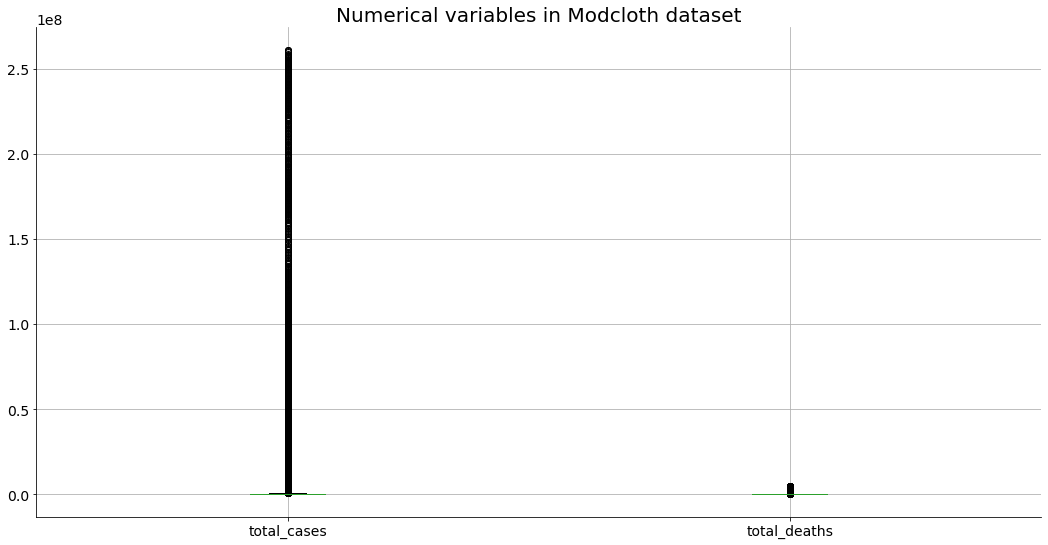

In [67]:
num_cols = ['total_cases','total_deaths',]
plt.figure(figsize=(18,9))
usecols[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

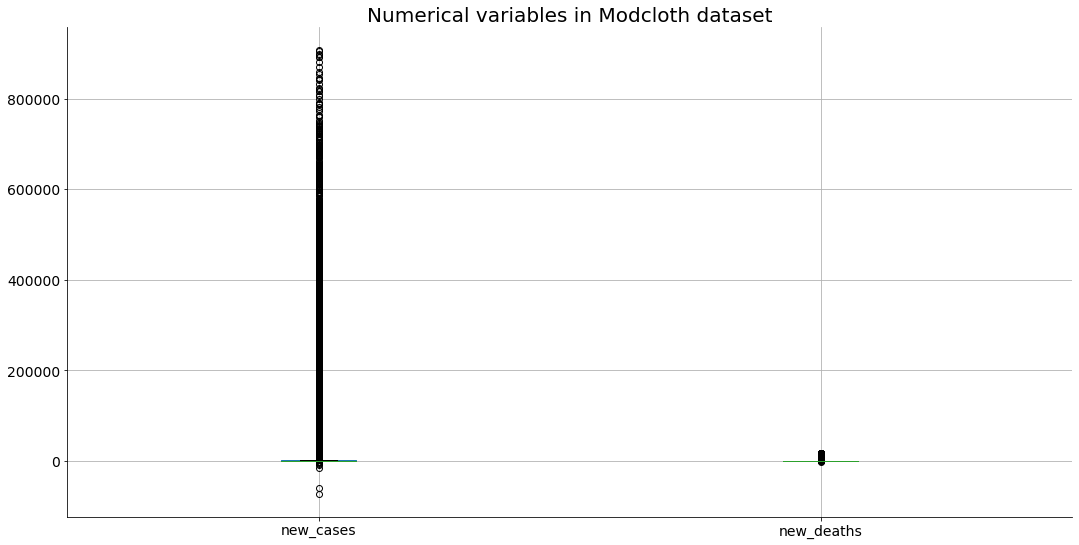

In [69]:
num_cols = ['new_cases','new_deaths',]
plt.figure(figsize=(18,9))
usecols[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

In [81]:
usecols.sort_values(by=['total_cases'], ascending=False).head(5)


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,total_vaccinations,reproduction_rate,...,aged_65_older,gdp_per_capita,male_smokers,female_smokers,extreme_poverty,life_expectancy,diabetes_prevalence,cardiovasc_death_rate,handwashing_facilities,human_development_index
134414,NaN,World,2021-11-27,261075046.0,416278.0,5195138.0,5736.0,NaN,7.896928e+09,NaN,...,8.696,15469.207,34.635,6.434,10.0,72.58,8.51,233.07,60.13,0.737
134413,NaN,World,2021-11-26,260658768.0,594299.0,5189402.0,6953.0,NaN,7.878642e+09,NaN,...,8.696,15469.207,34.635,6.434,10.0,72.58,8.51,233.07,60.13,0.737
134412,NaN,World,2021-11-25,260064469.0,599318.0,5182449.0,7788.0,NaN,7.849936e+09,1.08,...,8.696,15469.207,34.635,6.434,10.0,72.58,8.51,233.07,60.13,0.737
134411,NaN,World,2021-11-24,259465151.0,670962.0,5174661.0,8532.0,NaN,7.824569e+09,1.08,...,8.696,15469.207,34.635,6.434,10.0,72.58,8.51,233.07,60.13,0.737
134410,NaN,World,2021-11-23,258794189.0,588101.0,5166129.0,8030.0,NaN,7.790810e+09,1.09,...,8.696,15469.207,34.635,6.434,10.0,72.58,8.51,233.07,60.13,0.737


In [ ]:
def plot_dist(col, ax):
    usecols[col][usecols[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("Distribution".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['total_cases','new_cases','total_deaths','new_deaths','total_tests']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)